# Object Detection for Airtime Scratchcard Digits

## Introduction
Hello everyone! In this project, I will focus on the task of converting Safaricom and Telkom scratchcard airtime images into digits that can be used to load airtime. In the past, there was an app called "RechargeKing" that allowed users to load airtime by capturing images of scratchcards. However, recent changes in the fonts of Safaricom and Telkom scratch cards have rendered the app obsolete as the developers did not update it.

## Problem Definition
The problem I aim to solve is the digit recognition from scratchcard images. I want to create a solution that can automatically extract the airtime digits from these images, allowing users to easily load airtime without manual input.

## Solution
To tackle this problem, I will leverage Nicholas Renotte's TensorFlow Object Detection course, which provides a comprehensive guide on using TensorFlow for object detection. This course will serve as my foundation to build an object detection model capable of recognizing and extracting the digits from scratchcard images. I will use Python for coding and follow the principles outlined in the course.

Let's get started!


# Steps to Achieve Object Detection

1. **Install and Setup**: We'll start by setting up our development environment and installing the necessary libraries, including TensorFlow.

2. **Collect Images and Label**: Next, we'll gather a dataset of images that contains the objects we want to detect. We'll also label these objects to train our model effectively.

3. **Training Models**: The heart of object detection is training models. I'll explain how to use pre-trained models or train custom ones to identify objects in images.

4. **Detecting Objects**: Once our models are trained, we'll apply them to real-world images to detect and locate objects accurately.

5. **Freezing and Conversion**: We'll discuss how to freeze and convert our trained model into a format suitable for deployment.

6. **Performance Tuning**: Object detection isn't just about accuracy; it's also about performance. We'll optimize our models for speed and efficiency.

7. **Packaging**: Finally, I'll guide you on packaging your object detection solution for practical use.



I plan on doing most of the work here then the heavy lifting will be done on collab


# 1. **Install and Setup**


In [1]:
# # create venv environment 
# !python -m venv tfod

# # activate tfod env 
# !source tfod/bin/activate

In [ ]:
# # upgrade pip
# !python -m pip install --upgrade pip

# # install ipykernel
# !pip install ipykernel

# # assosiate ipykernel to tfod env where name is the name of your virtual environment
# !python -m ipykernel install --user --name=tfod


# 2. **Collect Images and Label**


We will be using a number of scratchcard pictures(already used) and label them. right now i have about 50 so they should suffice


In [4]:
# install opencv
!pip install opencv-python

In [2]:
# import opencv 
import cv2

# import uuid 
import uuid

# import os 
import os

the IMAGES_PATH will host our images and corresponding labels

In [11]:
# make a folder for images
IMAGES_PATH =  os.path.join('tensorflow','workspace','images', 'collectedimages')

if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
        !mkdir {IMAGES_PATH}

I used 40 images of scratch cards for labeling.


## 2.1 Label images using [labelImg](https://github.com/HumanSignal/labelImg)

install pyqt5 for labelimg gui rendering and lxml for handling xml templates

In [ ]:
# install pyqt5 lxml 
!pip install --upgrade pyqt5 lxml

In [2]:
# create a folder where the labelimg repo will be clones into 
LABELIMG_PATH = os.path.join('tensorflow', 'labelimg')


In [ ]:

# clone the git repo into the new folder about 200MB
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/HumanSignal/labelImg.git {LABELIMG_PATH}

In [8]:
# get into the folder and run the command shown 
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3
if os.name == 'nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc



In [5]:
# open the app 
!cd {LABELIMG_PATH} && python labelImg.py

Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203326.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203326.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203333.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203333.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203340.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203340.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203347.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203347.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow

2023-10-10T19:47:55.777ZE [7376:ShellIpcClient] shell_ipc_client.cc:138:Connect Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell
2023-10-10T19:47:55.812ZE [7376:ShellIpcClient] shell_ipc_client.cc:621:operator() Failed to connect to the server: NOT_FOUND: Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell [type.googleapis.com/drive.ds.Status='UNAVAILABLE_RESOURCE']
=== Source Location Trace: ===
apps/drive/fs/ipc/shell_ipc_client.cc:139

2023-10-10T19:47:55.812ZE [16936:ShellIpcClient] shell_ipc_client.cc:138:Connect Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell
2023-10-10T19:47:55.812ZE [16936:ShellIpcClient] shell_ipc_client.cc:621:operator() Failed to connect to the server: NOT_FOUND: Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell [type.googleapis.com/drive.ds.Status='UNAVAILABLE_RESOURCE']
=== Source Location Trace: ===
apps/drive/fs/ipc/shell_ipc_client.cc:139

2023-10-10T19:47:55.812ZE [7672:ShellIpcClient] shell_ipc_

typical labeling

![Screenshot 2023-10-10 230307.png](<attachment:Screenshot 2023-10-10 230307.png>)
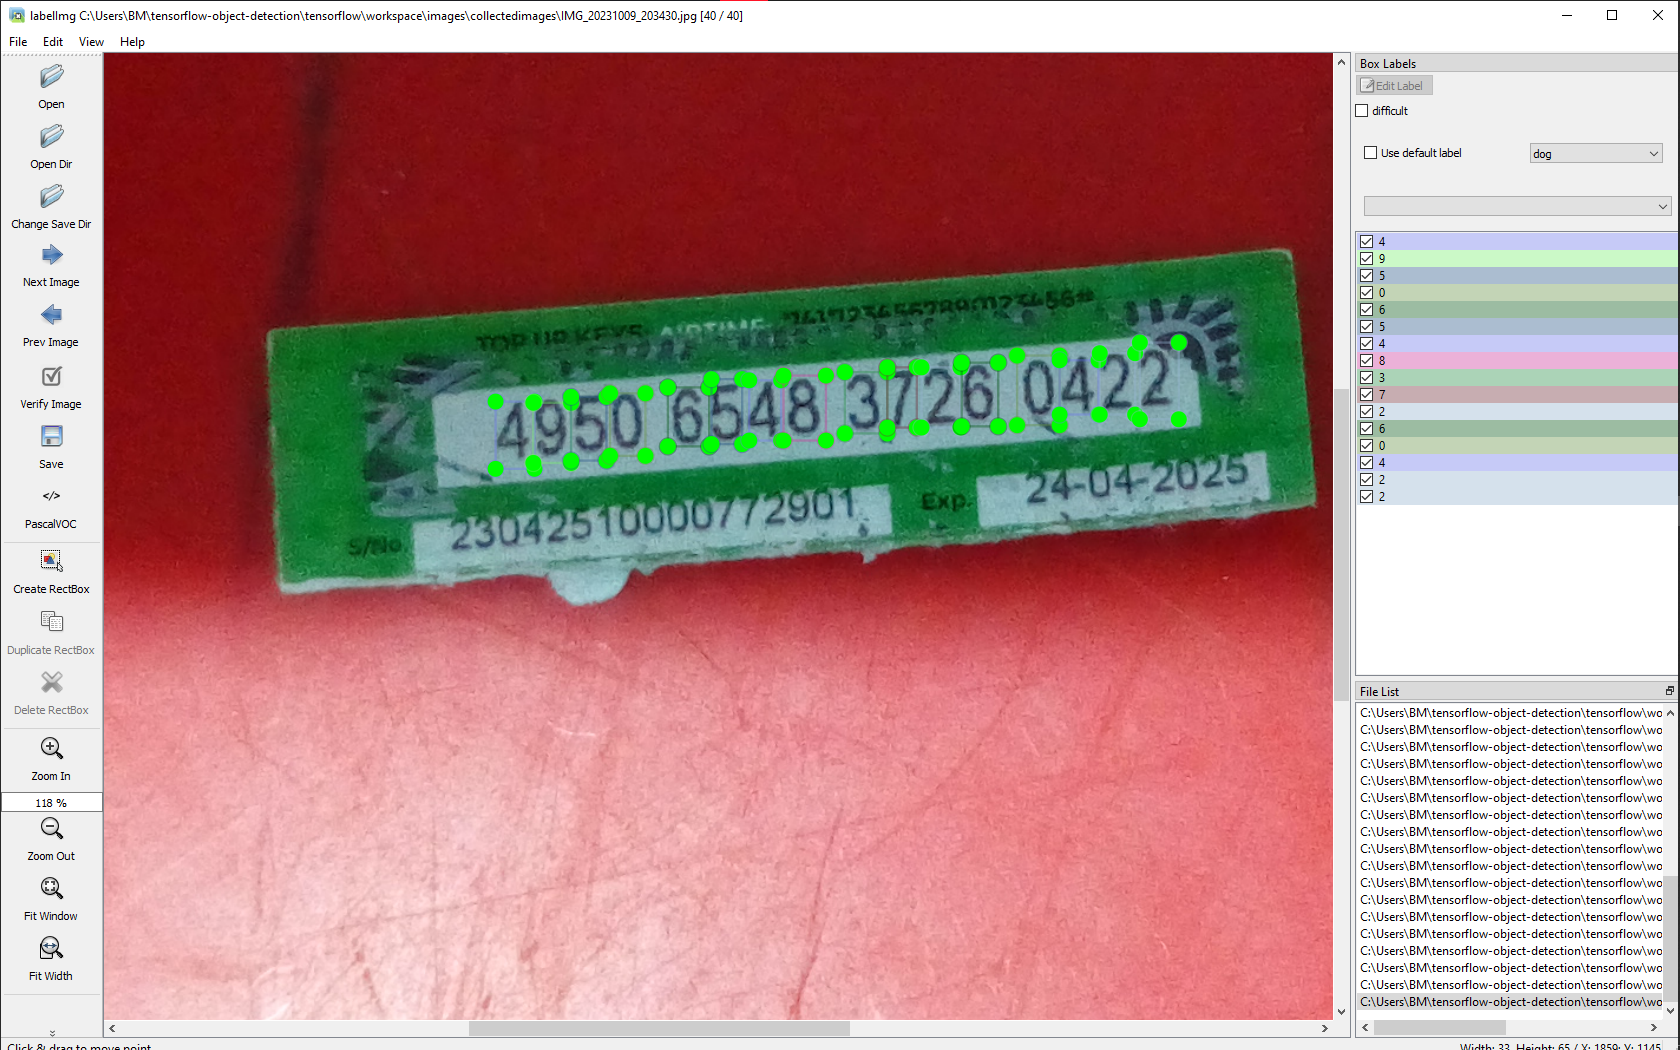

## **2.2 move them into a training and testing partition**

cretate two folders under images. one for training and one for testing.
we will split them 80/20 where we have 32 images for training and 8 images for testing


In [2]:
TRAINING_PATH = os.path.join('tensorflow', 'workspace','images', 'train')
TESTING_PATH = os.path.join('tensorflow', 'workspace','images', 'test')

NameError: name 'os' is not defined

In [4]:
if not os.path.exists(TRAINING_PATH) or not os.path.exists(TESTING_PATH):
    if os.name == 'posix':
        !mkdir -p {TRAINING_PATH}
        !mkdir -p {TESTING_PATH}
    if os.name == 'nt':
        !mkdir {TRAINING_PATH}
        !mkdir {TESTING_PATH}

copy-paste images plus respective annotations to train and test folders


# 3. **Training Models**


### **Training**
In order to leverage a custom TFOD model, we need to finetune /train a new computer vision model

### **Evaluation**
Once you have trained a model, ideally you want to take a look at how well it's performing. we normally take a look at:

Precision: TP/(TP+FP)
*what propotion of my detections were correct?*

Recall: TP/ (TP+FN)
*what propotion of the actual objects did I capture?*

Loss: 
*How well is the model performing against the data provided?*

# TensorFlow Model Zoo: Making Model Choices

Within the TensorFlow Model Zoo, you'll find a diverse array of models at your disposal, each designed for specific tasks. However, when making your selection, it's crucial to understand the trade-off that often comes into play.

In the realm of object detection and beyond, the rule of thumb is simple:

- Opting for faster detections often means sacrificing some degree of accuracy.
- On the flip side, if you prioritize higher accuracy, be prepared for slightly slower detection times.

Balancing these factors is key to choosing the right model for your particular use case. In the following sections, we'll delve deeper into the considerations that guide your model selection within the TensorFlow Model Zoo.


Current choices for this project:

1. **SSD MobileNet V2 FPNLite 640x640**:
   - Speed: Relatively fast due to MobileNet architecture.
   - Accuracy: 28.2 mAP (mean Average Precision), which is moderate.
   - Resolution: 640x640.
   - Suitable for scenarios where speed is more critical than very high accuracy.

2. **SSD ResNet50 V1 FPN 640x640 (RetinaNet50)**:
   - Speed: Moderate speed due to ResNet50 backbone.
   - Accuracy: 34.3 mAP, which is relatively good.
   - Resolution: 640x640.
   - A balanced choice for accuracy and speed.

3. **SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)**:
   - Speed: Slower than the 640x640 version.
   - Accuracy: 38.3 mAP, which is better.
   - Higher resolution (1024x1024) can provide better accuracy but at the cost of speed.
   - Choose this if you need higher accuracy and have the hardware to support it.

4. **SSD ResNet101 V1 FPN 640x640 (RetinaNet101)**:
   - Speed: Similar to ResNet50.
   - Accuracy: 35.6 mAP, which is quite good.
   - Resolution: 640x640.
   - Offers a good balance of speed and accuracy, similar to the RetinaNet50 models.

5. **SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)**:
   - Speed: Slower than the 640x640 version.
   - Accuracy: 39.5 mAP, which is the highest among the models listed.
   - Resolution: 1024x1024.
   - Opt for this if you require the highest accuracy and have the necessary hardware capabilities.

When choosing an object detection model, there are several critical factors to consider:

1. **Deployment Platform**: Think about where you intend to deploy this model. Will it run on a computer, a smartphone, a Raspberry Pi, or a different device? The hardware resources available on the deployment platform will impact your choice.

2. **Frame Processing Time**: Consider the time you're willing to allocate for processing each frame. Depending on your use case, you may require real-time or near-real-time processing. Faster models can be essential for applications where speed is of the essence.

3. **Accuracy Requirements**: Evaluate how accurate your model needs to be. In some cases, high accuracy is crucial, while in others, a slightly lower accuracy may be acceptable if it allows for faster processing.

Taking these factors into account, if you prioritize faster processing and your deployment platform has limited resources, `SSD MobileNet V2 FPNLite 640x640` could be an excellent choice. It strikes a balance between speed and accuracy, making it suitable for scenarios where real-time or near-real-time processing is desired.



## 3.1 **Setup paths**

In [3]:
import os

we are going to download `SSD MobileNet V2 FPNLite 640x640` and place it in our folder. this arrangement will be useful in collab.

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('tensorflow', 'scripts'),
    'APIMODEL_PATH': os.path.join('tensorflow', 'models'),
    'ANNOTATION_PATH': os.path.join('tensorflow', 'workspace', 'annotations'),
    'IMAGE_PATH': os.path.join('tensorflow', 'workspace', 'images'),
    'MODEL_PATH': os.path.join('tensorflow', 'workspace', 'models'),
    'PRETRAINED_MODEL_PATH': os.path.join('tensorflow', 'workspace', 'pretrained_models'),
    'CHECKPOINT_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH': os.path.join('tensorflow', 'workspace')
}



In [6]:
files = {
    'PIPELINE_CONFIG': os.path.join('tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## 3.2 **Download TF Models Pretrained Models from TensorFlow Model Zoo and Install TFOD.**

In [ ]:
# https://github.com/tensorflow/models/tree/master

In [8]:
# due to unexpected and irreversible errors, downgrade to tensorflow 2.13.0
!pip install tensorflow==2.13.0

In [27]:
# install wget
if os.name=='nt':
    !pip install wget
    import wget


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# clone the tfod garden into APIMODEL_PATH
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

^C


Cloning into 'tensorflow\models'...
Updating files:  27% (1007/3608)
Updating files:  28% (1011/3608)
Updating files:  29% (1047/3608)
Updating files:  30% (1083/3608)
Updating files:  31% (1119/3608)
Updating files:  32% (1155/3608)
Updating files:  33% (1191/3608)
Updating files:  34% (1227/3608)
Updating files:  35% (1263/3608)
Updating files:  36% (1299/3608)
Updating files:  37% (1335/3608)
Updating files:  38% (1372/3608)
Updating files:  38% (1382/3608)
Updating files:  39% (1408/3608)
Updating files:  40% (1444/3608)
Updating files:  41% (1480/3608)
Updating files:  41% (1510/3608)
Updating files:  42% (1516/3608)
Updating files:  42% (1534/3608)
Updating files:  43% (1552/3608)
Updating files:  44% (1588/3608)
Updating files:  45% (1624/3608)
Updating files:  46% (1660/3608)
Updating files:  47% (1696/3608)
Updating files:  47% (1701/3608)
Updating files:  48% (1732/3608)
Updating files:  49% (1768/3608)
Updating files:  50% (1804/3608)
Updating files:  51% (1841/3608)
Updatin

In [6]:
# install tensorflow object detection
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd tensorflow/models/research
    !protoc object_detection/protos/*.proto --python_out=.
    !cp object_detection/packages/tf2/setup.py . #&& python -m pip install . 

if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd tensorflow/models/research/slim && pip install -e . 

NameError: name 'wget' is not defined

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')

# verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.10: c:\Users\BM\tensorflow-object-detection\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-10-16 19:34:11.352428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W1016 19:34:14.359581 12584 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
c:\Users\BM\tensorflow-object-detection\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn

In [ ]:
# solve for ModuleNotFoundError: No module named 'tensorflow'
!pip install tensorflow

In [7]:
'''
solve:
TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).
'''

!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
!pip install pyyaml

'\nTypeError: Descriptors cannot not be created directly.\nIf this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.\nIf you cannot immediately regenerate your protos, some other possible workarounds are:\n 1. Downgrade the protobuf package to 3.20.x or lower.\n 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).\n'

In [ ]:
# incase there is a tensorflow object detection api error then follow this link https://github.com/tensorflow/models/issues/11085
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install apache-beam avro-python3 contextlib2 Cython lvis pycocotools
!pip install protobuf
!pip install pyyaml
!pip install tensorflow-io
!pip install portalocker tabulate

If the text in a Markdown cell appears too long and you want to hide or shorten it without deleting the content, you can use a combination of techniques:

1. **Use a Collapsible Section:** You can create a collapsible section in your Markdown cell by using HTML and JavaScript. This allows you to hide or show content as needed. Here's an example:

   ```markdown
   <details>
   <summary>Click to expand</summary>

   Your long text goes here.

   </details>
   ```

   In this example, the long text is initially hidden, and you can click "Click to expand" to reveal it.

To access your command history, you can use the history command:

To load and access command history in a Bash shell on a Windows system (assuming you are using a Bash emulation layer like Git Bash or WSL - Windows Subsystem for Linux), you can use a combination of built-in commands and environment variables. Here's how to do it:

1. Open your Bash shell, such as Git Bash or WSL.

2. To access your command history, you can use the `history` command:

   ```
   history
   ```

   This will display a list of previously executed commands along with line numbers.



a list of all command prompts i used while solving issues.
<details>
<summary>Click to expand</summary>

1. `pip list`
2. `pip install tensorflow`
3. `pip uninstall protobuf matplotlib -y`
4. `pip install protobuf matplotlib==3.2`
5. `pip install matplotlib`
6. `pip install pandas` 
7. `pip install scipy`
8. `pip install object-detection==0.1 apache-beam avro-python3 contextlib2 Cython lvis pycocotools`
9.  `pip install matplotlib`
10. `pip install protobuf`
11. `pip install pyyaml`
12. `pip uninstall protobuff`
13. `pip install protobuf==3.20.3`
14. `pip install tensorflow-io`
15. `pip install object-detection==0.1 apache-beam avro-python3 contextlib2 Cython lvis pycocotools tf-models-official>=2.5.1`
16. `pip install apache-beam avro-python3 contextlib2 Cython lvis pycocotools tf-models-official>=2.5.1`
17. `pip install apache-beam avro-python3 contextlib2 Cython lvis pycocotools`
18. `pip install tf-models-official`
19. `pip install portalocker`
20. `pip install tabulate`
21. `pip install tf-models-official`
22. `pip install tf-models-official`
23. `pip install --upgrade setuptools`
24. `pip install tf-models-official`
25. `pip install tf-models-official`
26. `cd tensorflow`
27. `git clone https://github.com/tensorflow/models models`
28. `cd models`
29. `git clone https://github.com/tensorflow/models`
30. `git clone https://github.com/tensorflow/models`
31. `cd ..`
32. `cd ..`
33. `pip uninstall Cython -y`
34. `cd tensorflow/models`
35. `cd research`
36. `protoc object_detection/protos/*.proto --python_out= .`
37. `cp object_detection/packages/tf2/setup.py .`
38. `python -m pip install .`
39. `protoc object_detection/protos/*.proto --python_out= .`
40. `protoc object_detection/protos/*.proto --python_out= .`
41. `cd ..`
42. `cd ..`
43. `cd ..`
44. `cd models/research`
45. `protoc object_detection/protos/*.proto --python_out= .`
46. `cp object_detection/packages/tf2/setup.py .`

</details>




In [10]:
import object_detection

In [28]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [11]:
print(paths['PRETRAINED_MODEL_PATH'])

tensorflow\workspace\pretrained_models


If your network connection is not reliable or is running slowly, you can download the model directly from [this link](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz). Once downloaded, you can unzip the file using a tool like WinRAR.

Ensure that you extract the model to the following location: `tensorflow/workspace/pretrained_models`.


## 3.3 **Create a Label Map**

our labels consist of numbers from 0 to 9

In [12]:
labels = [
    {'name':'0', 'id':1},
    {'name':'1', 'id':2},
    {'name':'2', 'id':3},
    {'name':'3', 'id':4},
    {'name':'4', 'id':5},
    {'name':'5', 'id':6},
    {'name':'6', 'id':7},
    {'name':'7', 'id':8},
    {'name':'8', 'id':9},
    {'name':'9', 'id':10}
]

# here, a label map file is being created where each label is defined with its name and ID
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [31]:
print(files['LABELMAP'])

tensorflow\workspace\annotations\label_map.pbtxt


## **3.4 Create TF records**

In [13]:
# clone nicks tf python script
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [11]:
!pip install pytz

In [14]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 


Successfully created the TFRecord file: tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: tensorflow\workspace\annotations\test.record


In [15]:
print(paths['PRETRAINED_MODEL_PATH'])

tensorflow\workspace\pretrained_models


what the code does is basically running the python script inside of tf_record_script, opens up the image source file in train/test, opens up the labelmap folder

## 3.4 **copy model config to training folder**

In [16]:
if os.name == 'posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}


        1 file(s) copied.


## 3.5 **Update Config to Training Folder**

In [17]:
import tensorflow as tf
from object_detection.utils import config_util #manipulate config files
from object_detection.protos import pipeline_pb2 #define pipeline configs
from google.protobuf import text_format #covert config files into protobuf n human text

In [19]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [20]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'r') as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]
         

In [23]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'wb') as f:
    f.write(config_text)

## 3.5 *Train The Model*

In [24]:
TRAINING_SCRIPT = os.path.join(paths["APIMODEL_PATH"], 'research', 'object_detection', 'model_main_tf2.py')

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [29]:
print(command)

python tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=1000


In [30]:
!{command}

2023-10-16 19:48:48.978684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1016 19:48:49.216840  9016 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 1000
I1016 19:48:51.498869  9016 config_util.py:552] Maybe overwriting train_steps: 1000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1016 19:48:51.498869  9016 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1016 19:48:51.707681  9016 deprecation.py:364] From c:\Users\BM\tensorflow-

In [ ]:
!pip install gin-config==0.1.1


# 4. **Detecting Objects**



# 5. **Freezing and Conversion**



# 6. **Performance Tuning**



# 7. **Packaging**